**Let's connect on** [Linkedin](https://www.linkedin.com/in/simronwaskar/)

# **Extreme Weather Forecasts Prediction Model**

# Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from catboost import CatBoostRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2023/train_data.csv
/kaggle/input/widsdatathon2023/test_data.csv
/kaggle/input/widsdatathon2023/sample_solution.csv


# Load dataset into pandas dataframe

In [2]:
# Load the datasets
train_data = pd.read_csv('/kaggle/input/widsdatathon2023/train_data.csv')
test_data = pd.read_csv('/kaggle/input/widsdatathon2023/test_data.csv')

In [3]:
# Displaying initial 10 rows in the dataset
train_data.head(10)

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95
5,5,0.0,0.833333,9/6/14,237.87,29.02,31.64,29.57,30.73,29.71,...,18.50,-31.46,9.53,38.36,-7.64,59.50,-11.27,-52.07,23.96,12.09
6,6,0.0,0.833333,9/7/14,236.36,29.02,31.64,29.57,30.73,29.71,...,21.72,-22.72,17.99,38.10,-7.09,63.29,-16.52,-52.61,31.40,12.76
7,7,0.0,0.833333,9/8/14,233.36,29.02,31.64,29.57,30.73,29.71,...,21.40,-12.81,30.81,36.88,-5.39,64.69,-18.54,-48.94,39.80,11.65
8,8,0.0,0.833333,9/9/14,233.82,29.02,31.64,29.57,30.73,29.71,...,18.79,-3.38,45.85,34.57,-2.46,62.43,-19.59,-45.81,46.65,8.39
9,9,0.0,0.833333,9/10/14,229.74,29.02,31.64,29.57,30.73,29.71,...,20.08,-5.34,62.80,26.96,-3.72,63.91,-27.55,-40.83,46.77,4.96


# Explore the dataset

In [4]:
# Displaying summary statistics of numerical columns
train_data.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
count,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,359800.000000,375734.000000,375734.000000,375734.000000,...,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000
mean,187866.500000,0.592766,0.517964,276.744064,10.801682,12.726739,10.099323,11.638229,10.733886,11.772646,...,-1.209959,-8.109918,6.800684,19.251970,-17.697565,-9.846867,-6.231860,16.014364,10.489945,11.296334
std,108465.207359,0.251744,0.272059,198.085182,10.952417,11.073553,10.339626,10.574276,9.403434,10.689967,...,37.317333,36.201507,38.458878,25.288526,31.946748,34.164678,27.050356,25.847455,25.070435,25.113214
min,0.000000,0.000000,0.000000,-2.310000,-14.960000,-14.970000,-11.720000,-17.560000,-13.720000,-13.330000,...,-94.570000,-89.940000,-64.870000,-39.280000,-100.560000,-106.080000,-93.980000,-52.610000,-66.110000,-57.610000
25%,93933.250000,0.409091,0.300000,104.062500,1.550000,3.650000,1.640000,3.080000,3.390000,2.970000,...,-27.200000,-33.350000,-19.650000,1.960000,-40.030000,-32.170000,-20.170000,-0.360000,-6.790000,-5.570000
50%,187866.500000,0.590909,0.533333,250.320000,9.950000,11.890000,9.490000,11.600000,10.890000,11.280000,...,-3.200000,-9.390000,2.330000,20.050000,-16.710000,-8.560000,-6.030000,18.650000,11.860000,11.650000
75%,281799.750000,0.818182,0.766667,420.010000,20.230000,22.110000,18.740000,20.360000,18.330000,20.300000,...,24.940000,17.960000,28.660000,35.090000,4.390000,10.500000,11.630000,31.210000,29.040000,29.180000
max,375733.000000,1.000000,1.000000,1185.140000,36.080000,36.030000,33.390000,34.640000,35.750000,38.350000,...,113.920000,96.550000,106.420000,91.760000,56.550000,83.890000,64.850000,90.390000,76.890000,88.660000


In [5]:
# Displaying all the columns in the dataset
pd.set_option('display.max_columns', None)
train_data.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [6]:
# Displaying datatype of attributes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 705.2+ MB


In [7]:
# Displaying number of rows and columns in the dataset
train_data.shape

(375734, 246)

In [8]:
# Checking for missing data in the dataset
train_data.isnull().sum()

index                                 0
lat                                   0
lon                                   0
startdate                             0
contest-pevpr-sfc-gauss-14d__pevpr    0
                                     ..
wind-vwnd-925-2010-16                 0
wind-vwnd-925-2010-17                 0
wind-vwnd-925-2010-18                 0
wind-vwnd-925-2010-19                 0
wind-vwnd-925-2010-20                 0
Length: 246, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


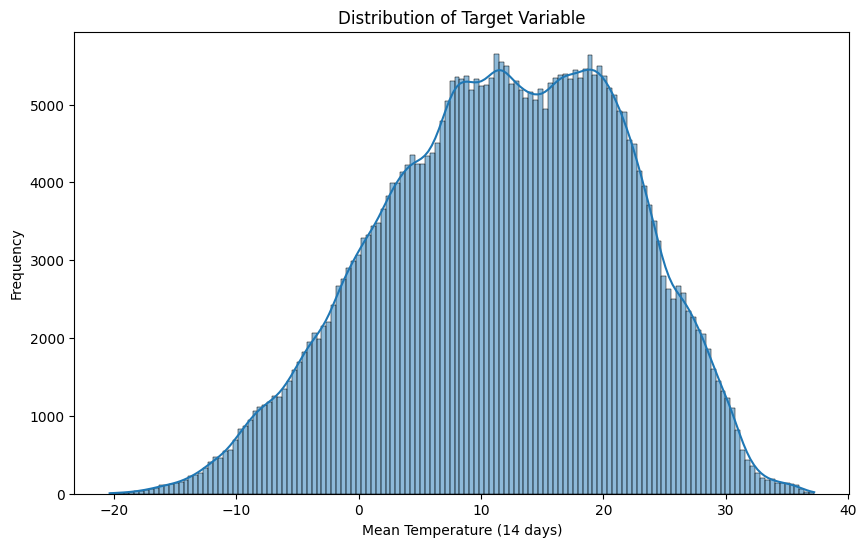

In [9]:
# Histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(train_data['contest-tmp2m-14d__tmp2m'], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Mean Temperature (14 days)')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

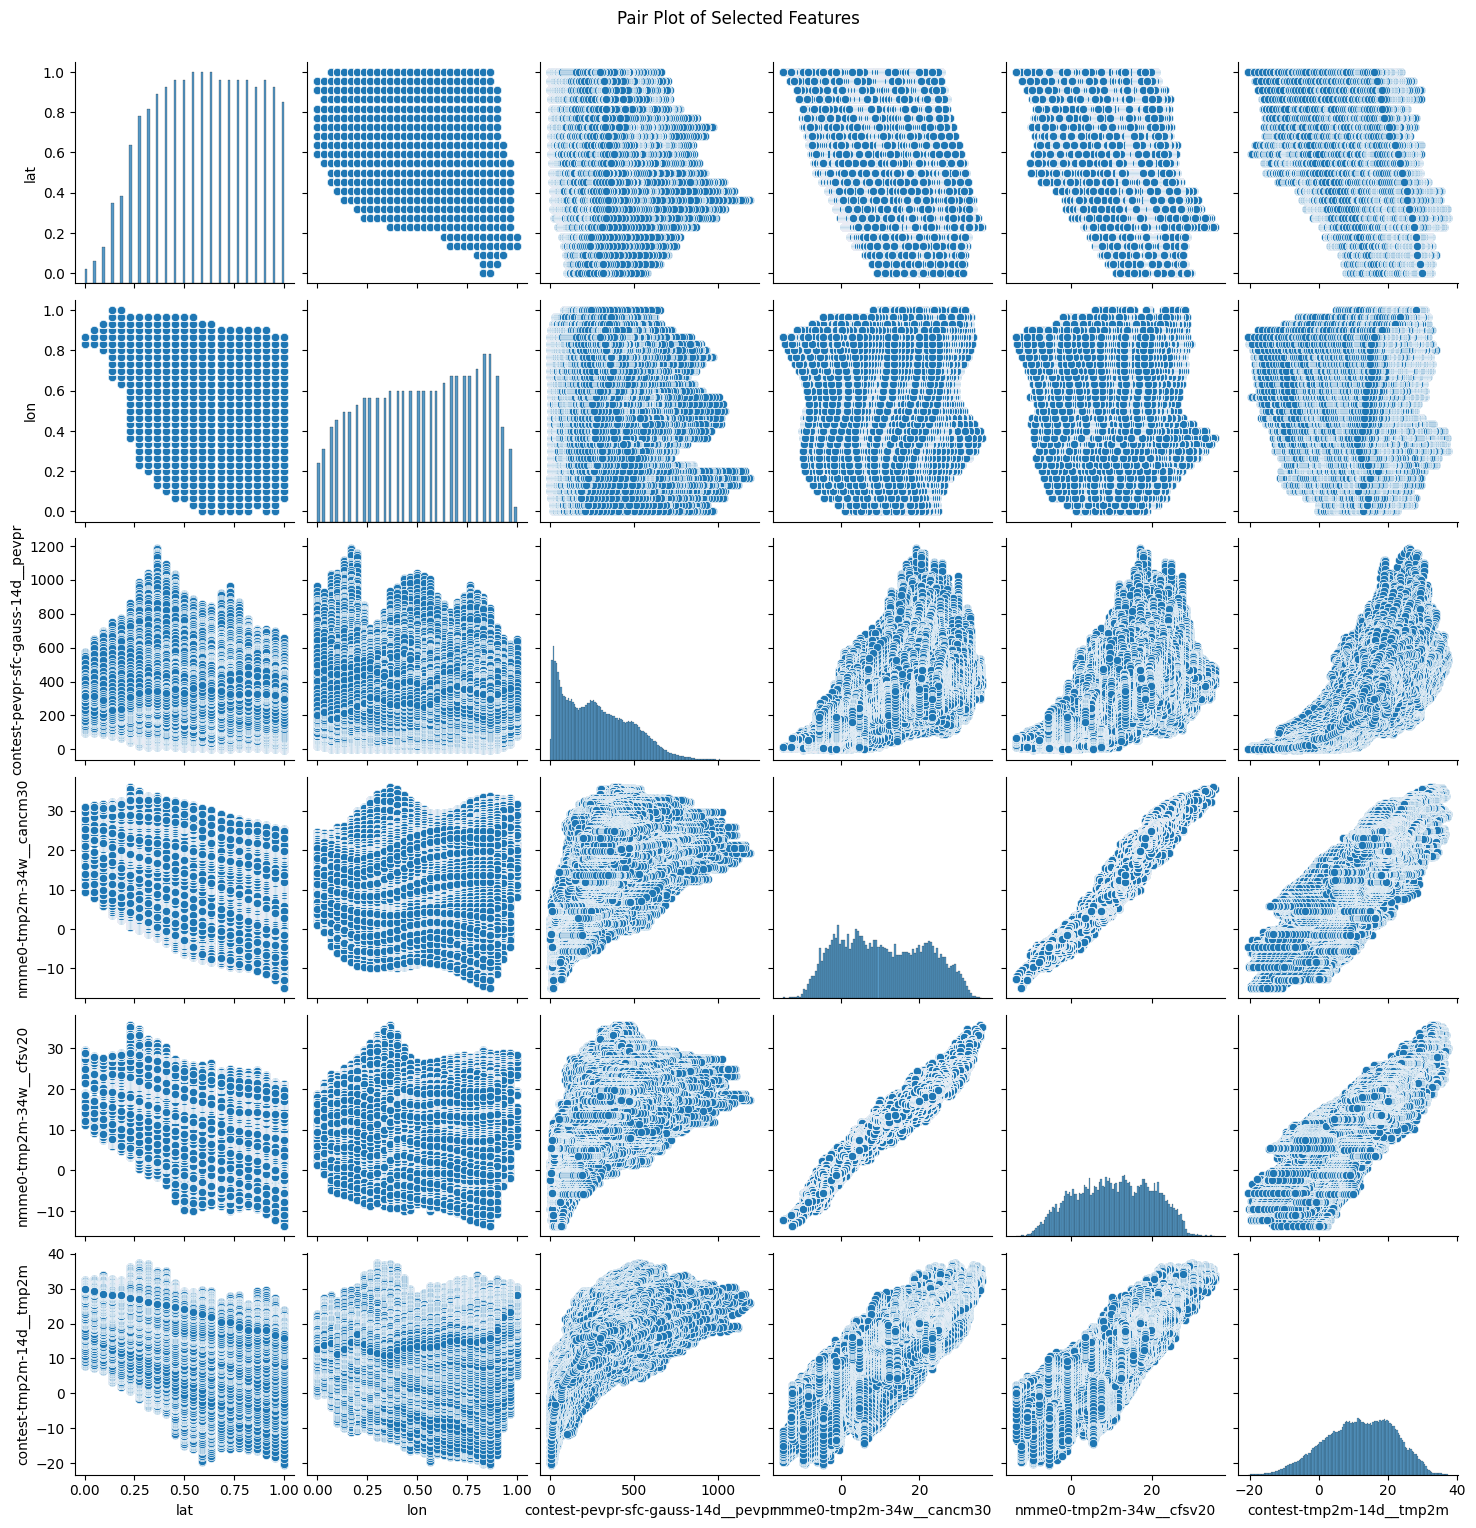

In [10]:
# Visualize relationships between a selection of features using a pair plot.
# Select a subset of features for the pair plot
features = [
    'lat', 
    'lon', 
    'contest-pevpr-sfc-gauss-14d__pevpr', 
    'nmme0-tmp2m-34w__cancm30', 
    'nmme0-tmp2m-34w__cfsv20', 
    'contest-tmp2m-14d__tmp2m'
]

# Ensure all selected features exist in the dataset
missing_features = [feature for feature in features if feature not in train_data.columns]
if missing_features:
    print(f"Missing features: {missing_features}")
else:
    # Create pair plot
    sns.pairplot(train_data[features])
    plt.suptitle('Pair Plot of Selected Features', y=1.02)
    plt.show()

/tmp/ipykernel_18/1125950954.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['startdate'] = pd.to_datetime(train_data['startdate'])


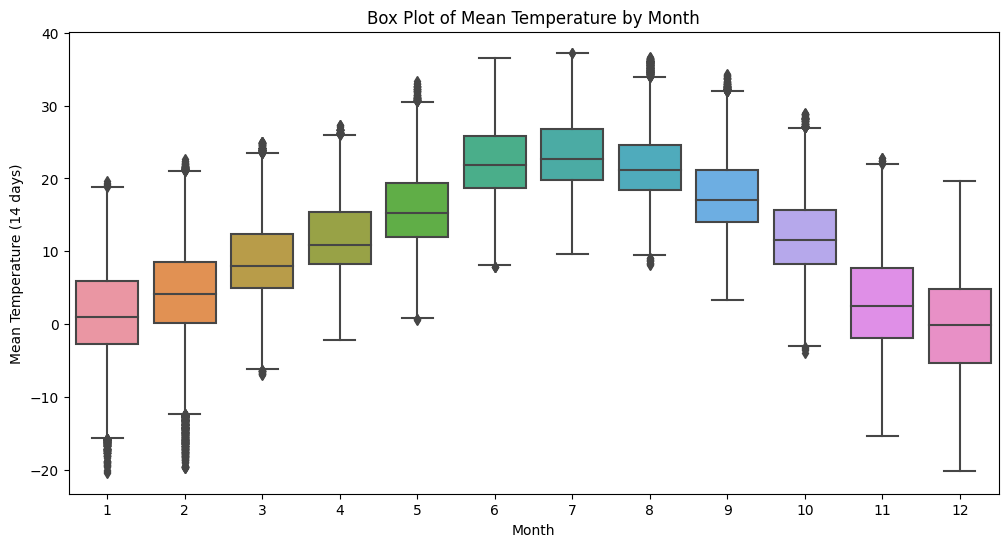

In [11]:
# Visualize the distribution of the target variable by month
train_data['startdate'] = pd.to_datetime(train_data['startdate'])
train_data['month'] = train_data['startdate'].dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='contest-tmp2m-14d__tmp2m', data=train_data)
plt.title('Box Plot of Mean Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (14 days)')
plt.show()


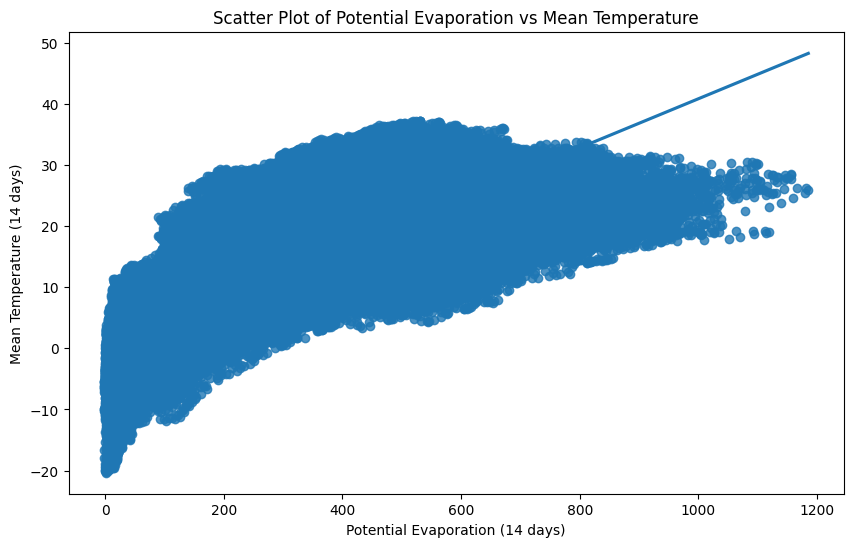

In [12]:
# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='contest-pevpr-sfc-gauss-14d__pevpr', y='contest-tmp2m-14d__tmp2m', data=train_data)
plt.title('Scatter Plot of Potential Evaporation vs Mean Temperature')
plt.xlabel('Potential Evaporation (14 days)')
plt.ylabel('Mean Temperature (14 days)')
plt.show()


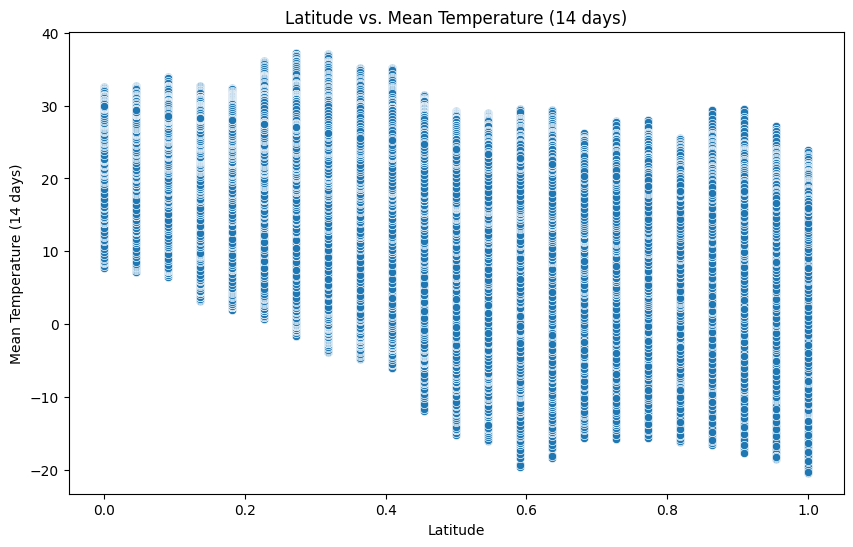

In [13]:
# Scatter Plot of Latitude vs. Mean Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat', y='contest-tmp2m-14d__tmp2m', data=train_data)
plt.title('Latitude vs. Mean Temperature (14 days)')
plt.xlabel('Latitude')
plt.ylabel('Mean Temperature (14 days)')
plt.show()


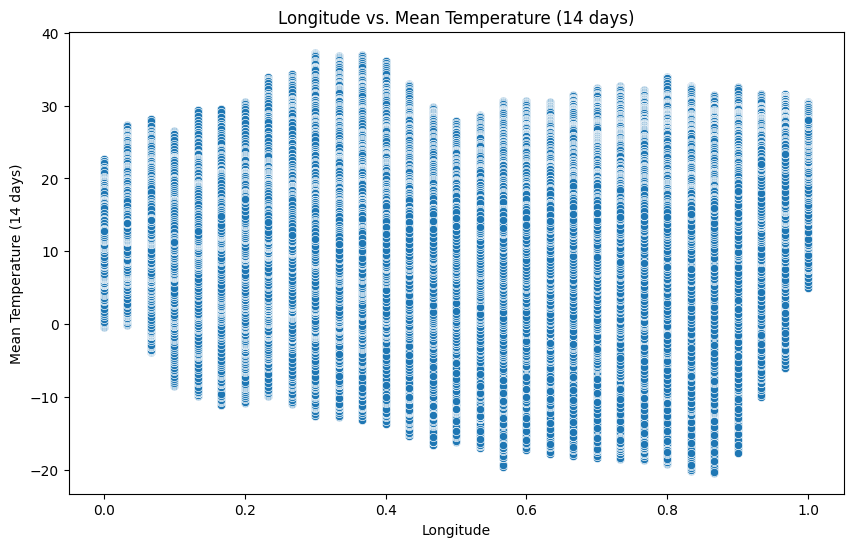

In [14]:
# Scatter Plot of Longitude vs. Mean Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lon', y='contest-tmp2m-14d__tmp2m', data=train_data)
plt.title('Longitude vs. Mean Temperature (14 days)')
plt.xlabel('Longitude')
plt.ylabel('Mean Temperature (14 days)')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


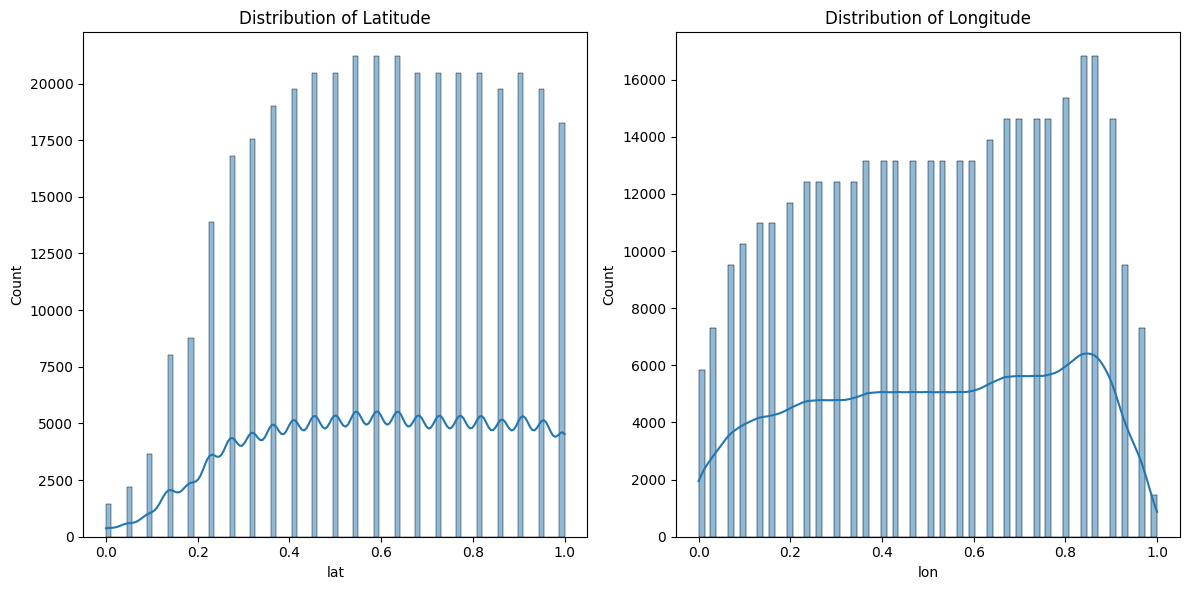

In [15]:
# Distribution Plot of Latitude and Longitude Features
plt.figure(figsize=(12, 6))

# Distribution plot for latitude
plt.subplot(1, 2, 1)
sns.histplot(train_data['lat'], kde=True)
plt.title('Distribution of Latitude')

# Distribution plot for longitude
plt.subplot(1, 2, 2)
sns.histplot(train_data['lon'], kde=True)
plt.title('Distribution of Longitude')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


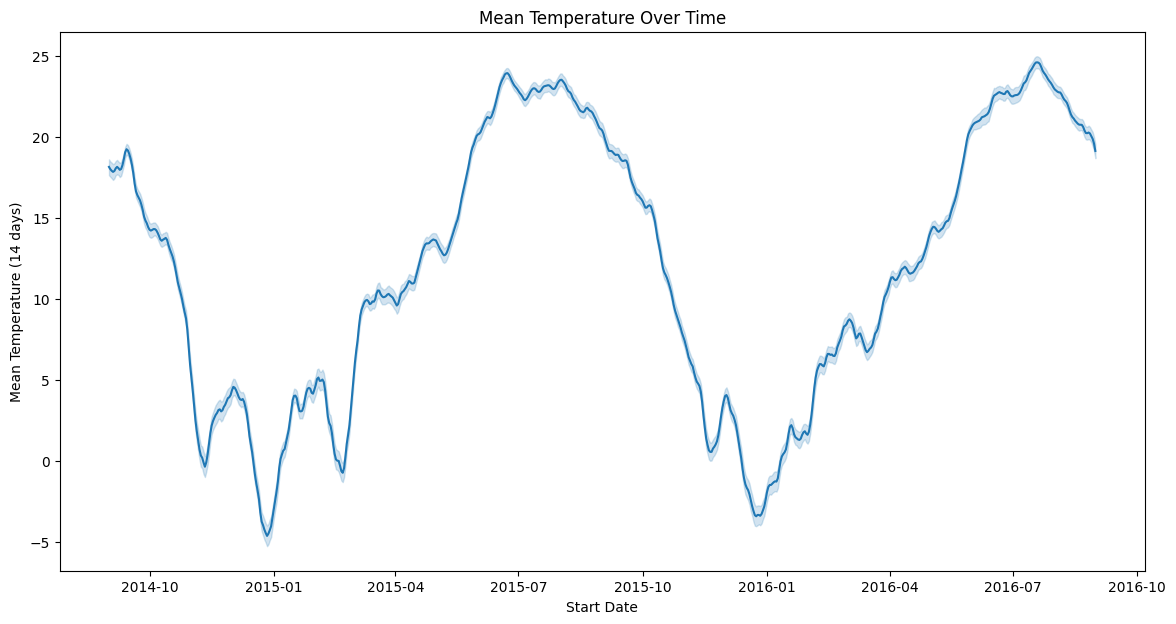

In [16]:
# Line Plot of Mean Temperature Over Time
# Visualize how the mean temperature changes over time
train_data['startdate'] = pd.to_datetime(train_data['startdate'])
train_data.sort_values('startdate', inplace=True)

plt.figure(figsize=(14, 7))
sns.lineplot(x='startdate', y='contest-tmp2m-14d__tmp2m', data=train_data)
plt.title('Mean Temperature Over Time')
plt.xlabel('Start Date')
plt.ylabel('Mean Temperature (14 days)')
plt.show()


# Feature Engineering

Handling Date Features

In [17]:
train_data['startdate'] = pd.to_datetime(train_data['startdate'])
train_data['month'] = train_data['startdate'].dt.month
train_data['season'] = train_data['startdate'].dt.month % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall
train_data['year'] = train_data['startdate'].dt.year

# Repeat for the test data
test_data['startdate'] = pd.to_datetime(test_data['startdate'])
test_data['month'] = test_data['startdate'].dt.month
test_data['season'] = test_data['startdate'].dt.month % 12 // 3 + 1
test_data['year'] = test_data['startdate'].dt.year


/tmp/ipykernel_18/3291215035.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['startdate'] = pd.to_datetime(test_data['startdate'])


Handling Climate_regions Features

In [18]:
# Perform one-hot encoding for 'climateregions_climateregion'
train_data = pd.get_dummies(train_data, columns=['climateregions__climateregion'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['climateregions__climateregion'], drop_first=True)

# Split Data for Validation

In [19]:
# Splitting data into train and test dataset
X = train_data.drop(['contest-tmp2m-14d__tmp2m', 'startdate'], axis=1)
y = train_data['contest-tmp2m-14d__tmp2m']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model

***LightGBM Model***

In [20]:
# Define LGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Create LGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# Train LGBM model
model_lgbm = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[train_data, val_data],
                       callbacks=[lgb.early_stopping(stopping_rounds=100), lgb.log_evaluation(period=100)])


Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.14035	valid_1's rmse: 1.14377
[200]	training's rmse: 0.854821	valid_1's rmse: 0.866099
[300]	training's rmse: 0.737225	valid_1's rmse: 0.752537
[400]	training's rmse: 0.667487	valid_1's rmse: 0.685491
[500]	training's rmse: 0.618345	valid_1's rmse: 0.638598
[600]	training's rmse: 0.581426	valid_1's rmse: 0.603785
[700]	training's rmse: 0.550609	valid_1's rmse: 0.57451
[800]	training's rmse: 0.523365	valid_1's rmse: 0.54886
[900]	training's rmse: 0.49913	valid_1's rmse: 0.526267
[1000]	training's rmse: 0.478512	valid_1's rmse: 0.506955
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.478512	valid_1's rmse: 0.506955


# Predicting the Model

In [21]:
# Predict on the validation set
y_pred_lgbm = model_lgbm.predict(X_val, num_iteration=model_lgbm.best_iteration)


# Evaluate the Model

In [22]:
# Evaluate the model
rmse_lgbm = mean_squared_error(y_val, y_pred_lgbm, squared=False)
print(f'Validation RMSE (LGBM): {rmse_lgbm}')


Validation RMSE (LGBM): 0.506955054565502


# Training the Model

**CatBoost Model**

In [23]:
# Define CatBoost parameters
params_catboost = {
    'iterations': 1000,
    'learning_rate': 0.05,
    'eval_metric': 'RMSE',
    'random_seed': 42,
    'verbose': 100
}

# Train CatBoost model
model_catboost = CatBoostRegressor(**params_catboost)
model_catboost.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100)

0:	learn: 9.4353571	test: 9.4404703	best: 9.4404703 (0)	total: 363ms	remaining: 6m 2s
100:	learn: 1.5194258	test: 1.5152226	best: 1.5152226 (100)	total: 26s	remaining: 3m 51s
200:	learn: 1.2194984	test: 1.2198295	best: 1.2198295 (200)	total: 48.4s	remaining: 3m 12s
300:	learn: 1.0605366	test: 1.0632465	best: 1.0632465 (300)	total: 1m 12s	remaining: 2m 47s
400:	learn: 0.9509607	test: 0.9557544	best: 0.9557544 (400)	total: 1m 36s	remaining: 2m 24s
500:	learn: 0.8741025	test: 0.8804757	best: 0.8804757 (500)	total: 2m	remaining: 2m
600:	learn: 0.8146605	test: 0.8225964	best: 0.8225964 (600)	total: 2m 24s	remaining: 1m 36s
700:	learn: 0.7656643	test: 0.7749473	best: 0.7749473 (700)	total: 2m 49s	remaining: 1m 12s
800:	learn: 0.7277392	test: 0.7378315	best: 0.7378315 (800)	total: 3m 14s	remaining: 48.3s
900:	learn: 0.6945750	test: 0.7058718	best: 0.7058718 (900)	total: 3m 39s	remaining: 24.1s
999:	learn: 0.6665880	test: 0.6787821	best: 0.6787821 (999)	total: 4m 3s	remaining: 0us

bestTest = 

# Predicting the Model

In [24]:
# Predict on the validation set
y_pred_catboost = model_catboost.predict(X_val)

# Evaluate the Model

In [25]:
# Evaluate the model
rmse_catboost = mean_squared_error(y_val, y_pred_catboost, squared=False)
print(f'Validation RMSE (CatBoost): {rmse_catboost}')

Validation RMSE (CatBoost): 0.678782127621361


After training the models using LightGBM and CatBoost we can conclude that **LightGBM** **performs better** which has an RMSE value of 0.5069